In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [5]:
#label RA/DZ

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(100))
print("*****************************")
station["prec_l"].value_counts(normalize=True)

                    wxcodes_o    prec_l
time                                   
2020-12-18 07:30:00  FG -RADZ     RA/DZ
2020-08-01 20:30:00         M  No RA/DZ
2019-05-06 23:00:00   BCFG DZ     RA/DZ
2020-06-09 15:00:00         M  No RA/DZ
2019-06-22 01:30:00         M  No RA/DZ
2018-10-21 08:30:00         M  No RA/DZ
2018-11-05 13:30:00       -RA     RA/DZ
2020-08-21 06:39:00        RA     RA/DZ
2020-07-14 08:00:00         M  No RA/DZ
2019-12-02 15:00:00         M  No RA/DZ
2019-04-24 15:30:00       -RA     RA/DZ
2019-03-03 15:00:00         M  No RA/DZ
2020-04-03 22:30:00         M  No RA/DZ
2020-10-31 06:00:00        FG  No RA/DZ
2020-02-12 16:00:00         M  No RA/DZ
2018-12-24 07:00:00         M  No RA/DZ
2020-05-06 04:30:00         M  No RA/DZ
2020-10-11 22:00:00         M  No RA/DZ
2020-09-06 07:00:00         M  No RA/DZ
2020-07-05 18:00:00         M  No RA/DZ
2018-12-04 01:00:00         M  No RA/DZ
2020-08-10 16:00:00         M  No RA/DZ
2019-12-16 11:00:00  -RA BCFG     RA/DZ


No RA/DZ    0.867321
RA/DZ       0.132679
Name: prec_l, dtype: float64

**Forecast D1**

In [6]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,1,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,2,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,3,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,4,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,17491,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,17492,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,17493,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [12]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-06-18 10:00:00,No RA/DZ,170.461151,0.0,2004.262817,7.118326,11.639732,101157.984375,290.859253,0.802302,24045.226562,...,29.340000,-2.998187e+01,0.000000,0.290738,0.310000,0.310000,5577.182617,1463.336060,257.232178,282.984985
2019-09-08 21:00:00,No RA/DZ,20.003738,0.0,2905.580078,3.408196,4.932088,101876.585938,291.872314,0.747731,24135.000000,...,0.000000,4.453125e-05,0.000000,0.000000,0.000000,0.000000,5753.359863,1539.240601,261.381104,287.306305
2019-11-21 13:00:00,RA/DZ,188.368576,0.0,1301.718994,2.962776,4.902994,100479.312500,284.060364,0.870396,24043.443359,...,121.830002,-5.146524e-01,0.200000,0.410000,0.100000,0.410000,5389.804199,1388.398560,251.845245,275.036072
2020-11-06 10:00:00,RA/DZ,58.883850,0.0,2292.650879,3.233811,4.937368,100919.843750,288.152130,0.760049,24157.830078,...,0.000000,-4.335938e-03,0.090000,0.000000,0.200000,0.200000,5560.556152,1451.307739,255.139816,283.556183
2020-05-10 04:00:00,No RA/DZ,133.115982,0.0,1511.949951,0.749312,1.458510,100624.984375,282.268555,1.000000,250.061005,...,0.000000,-2.500000e-04,0.021618,0.316493,0.019683,0.316493,5434.665527,1407.312378,250.170685,278.570801
2020-07-08 11:00:00,No RA/DZ,281.631439,0.0,3264.075195,2.716504,2.395646,101546.796875,299.562378,0.582112,24051.806641,...,850.500000,-1.618231e+02,0.000000,0.000000,0.000000,0.000000,5741.728027,1531.107056,259.958496,291.741943
2020-09-01 21:00:00,No RA/DZ,18.439707,0.0,2837.044922,5.037094,6.863173,101629.148438,290.957886,0.763405,24219.193359,...,0.000000,-2.734375e-07,0.000000,0.000000,0.000000,0.000000,5734.125000,1516.977417,265.212952,285.115875
2019-03-08 20:00:00,No RA/DZ,259.635162,0.0,1553.143555,2.900367,3.932040,102774.312500,282.520905,0.933511,24078.359375,...,0.000000,3.554687e-04,0.000000,0.333498,0.000000,0.333498,5700.167969,1544.810791,257.783447,278.220001
2019-05-21 12:00:00,No RA/DZ,282.941010,0.0,1934.266846,3.426895,2.275101,101730.406250,293.353638,0.606124,24102.984375,...,8.730000,-5.493399e+00,0.000000,0.302540,0.000000,0.302540,5633.768066,1502.140137,259.169556,280.196869


**Meteorological model score**

In [28]:
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
cm = pd.crosstab(df_all1k.prec_l, y_pred,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS,2))

col_0     No RA/DZ  RA/DZ    All
prec_l                          
No RA/DZ     13449   1743  15192
RA/DZ          774   1194   1968
All          14223   2937  17160
Heidke Skill Score: 0.41


In [8]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:22<00:00,  2.83s/it]


In [9]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.80,0.82,None,0.83,0.12
NearestCentroid,0.83,0.82,None,0.85,0.18
BernoulliNB,0.82,0.81,None,0.85,0.21
LabelSpreading,0.90,0.74,None,0.90,16.62
LabelPropagation,0.90,0.74,None,0.90,11.50
LinearDiscriminantAnalysis,0.90,0.72,None,0.90,0.44
LGBMClassifier,0.91,0.72,None,0.91,1.31
ExtraTreesClassifier,0.92,0.71,None,0.91,1.89
AdaBoostClassifier,0.91,0.71,None,0.90,5.01


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2794    202  2996
RA/DZ          145    291   436
All           2939    493  3432
Heidke Skill Score: 0.57

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.950663  0.932577  0.941533  2996.000000
RA/DZ          0.590264  0.667431  0.626480   436.000000
accuracy       0.898893  0.898893  0.898893     0.898893
macro avg      0.770464  0.800004  0.784007  3432.000000
weighted avg   0.904878  0.898893  0.901509  3432.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2836    225  3061
RA/DZ          129    242   371
All           2965    467  3432
Heidke Skill Score: 0.52

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.956492  0.926495  0.941255

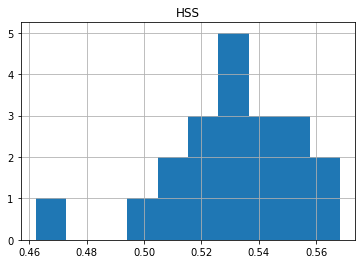

In [20]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [21]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:19<00:00,  2.74s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.83,0.84,None,0.86,0.22
QuadraticDiscriminantAnalysis,0.85,0.83,None,0.87,0.74
NearestCentroid,0.84,0.83,None,0.86,0.51
BernoulliNB,0.83,0.82,None,0.85,0.22
SGDClassifier,0.88,0.80,None,0.89,0.43
Perceptron,0.88,0.76,None,0.89,0.31
LabelSpreading,0.90,0.75,None,0.90,13.35
LabelPropagation,0.90,0.75,None,0.90,10.07
LGBMClassifier,0.92,0.75,None,0.92,1.51



Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2843    193  3036
RA/DZ          131    265   396
All           2974    458  3432
Heidke Skill Score: 0.57

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.955952  0.936430  0.946090  3036.000000
RA/DZ          0.578603  0.669192  0.620609   396.000000
accuracy       0.905594  0.905594  0.905594     0.905594
macro avg      0.767277  0.802811  0.783349  3432.000000
weighted avg   0.912411  0.905594  0.908534  3432.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2897    176  3073
RA/DZ          125    234   359
All           3022    410  3432
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.958637  0.942727  0.950615

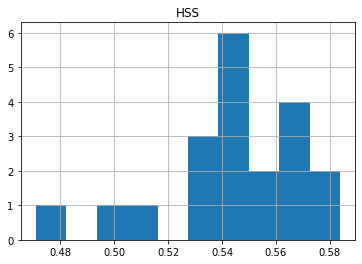

In [22]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();


In [23]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [24]:
import sklearn
print(sklearn.__version__)

0.24.1


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2139    151  2290
RA/DZ           83    201   284
All           2222    352  2574
Heidke Skill Score: 0.58

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.962646  0.934061  0.948138  2290.000000
RA/DZ          0.571023  0.707746  0.632075   284.000000
accuracy       0.909091  0.909091  0.909091     0.909091
macro avg      0.766834  0.820904  0.790107  2574.000000
weighted avg   0.919437  0.909091  0.913266  2574.000000

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2095    163  2258
RA/DZ           86    230   316
All           2181    393  2574
Heidke Skill Score: 0.59

Informe de calidad desagregado (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.960569  0.927812  0.943906

,HSS
count,10.000000
mean,0.597154
std,0.027708
min,0.549723
25%,0.582586
50%,0.596526
75%,0.621155
max,0.636030
